# **Customer Segmentation**

# Dataset Presentation

**Context:**

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

**Columns Description:**

* ID : Customer's ID.

* Gender : Customer's Gender (Male/Female)

* Ever_Married : Marrital Statue of the Customer (Yes/No)

* Age : Customer's Age

* Graduated : If the Customer is Graduated or No (Yes/No)

* Work_Experience : Customer's Work Experience in Years

* Spending Score : Spending Score of the Customer (Low,Average,High)

* Var_1 : Anonymised Category for the customer. ('Cat_1','Cat_2',..,'Cat_6')

* Segmentation : Category of the Customer

Link to dataset: https://www.kaggle.com/datasets/vetrirah/customer

# Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "drive/My Drive/Project/Cust_Segmen/automobile"

sample_submission.csv  Test.csv  Train.csv


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_rows', 50)

In [ ]:
# Read dataset
dir = 'drive/My Drive/Project/Cust_Segmen/automobile/Train.csv'
df = pd.read_csv(dir)
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


# Data Cleaning

In [ ]:
# Adjusting Columns Name
new_columns = []
for i in df.columns:
    new_columns.append(i.lower().replace(' ', '_'))

df.columns = new_columns
df.columns

Index(['id', 'gender', 'ever_married', 'age', 'graduated', 'profession',
       'work_experience', 'spending_score', 'family_size', 'var_1',
       'segmentation'],
      dtype='object')

In [ ]:
# Dropping Unused Columns
df.drop(columns = ['id','var_1','segmentation'] , inplace = True)

In [ ]:
# Checking Null Values
df.isnull().sum()

gender               0
ever_married       140
age                  0
graduated           78
profession         124
work_experience    829
spending_score       0
family_size        335
dtype: int64

In [ ]:
# Checking Unique Values and Sum Unique Values
for col in df.columns:
    uniq = df[col].unique()
    unique_values = df[col].value_counts()
    print(f"Column: {col}")
    print(uniq)
    print("Number of Unique Values:", len(uniq))
    print(f"Sum of Each Unique Values: \n{unique_values}")
    print("---------\n")

Column: gender
['Male' 'Female']
Number of Unique Values: 2
Sum of Each Unique Values: 
Male      4417
Female    3651
Name: gender, dtype: int64
---------

Column: ever_married
['No' 'Yes' nan]
Number of Unique Values: 3
Sum of Each Unique Values: 
Yes    4643
No     3285
Name: ever_married, dtype: int64
---------

Column: age
[22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Number of Unique Values: 67
Sum of Each Unique Values: 
35    250
37    234
33    232
42    232
40    229
     ... 
78     29
87     28
76     27
80     24
85     22
Name: age, Length: 67, dtype: int64
---------

Column: graduated
['No' 'Yes' nan]
Number of Unique Values: 3
Sum of Each Unique Values: 
Yes    4968
No     3022
Name: graduated, dtype: int64
---------

Column: profession
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor

In [ ]:
# Filling null values with values before null values
df['ever_married'] = df['ever_married'].fillna(method='pad')
df['graduated'] = df['graduated'].fillna(method='pad')
df['work_experience'] = df['work_experience'].fillna(method='pad')
df['family_size'] = df['family_size'].fillna(method='pad')

In [ ]:
# Dropping fields with the values which has null in profession column
df.dropna(subset = ['profession'] , inplace = True)

In [ ]:
# Checking info each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7944 entries, 0 to 8067
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7944 non-null   object 
 1   ever_married     7944 non-null   object 
 2   age              7944 non-null   int64  
 3   graduated        7944 non-null   object 
 4   profession       7944 non-null   object 
 5   work_experience  7944 non-null   float64
 6   spending_score   7944 non-null   object 
 7   family_size      7944 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 558.6+ KB


In [ ]:
df.describe()

,age,work_experience,family_size
count,7944.000000,7944.000000,7944.000000
mean,43.484768,2.620846,2.847810
std,16.720978,3.396868,1.529722
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


# Exploratory Data Analysis

## Exploring Categorical Feature

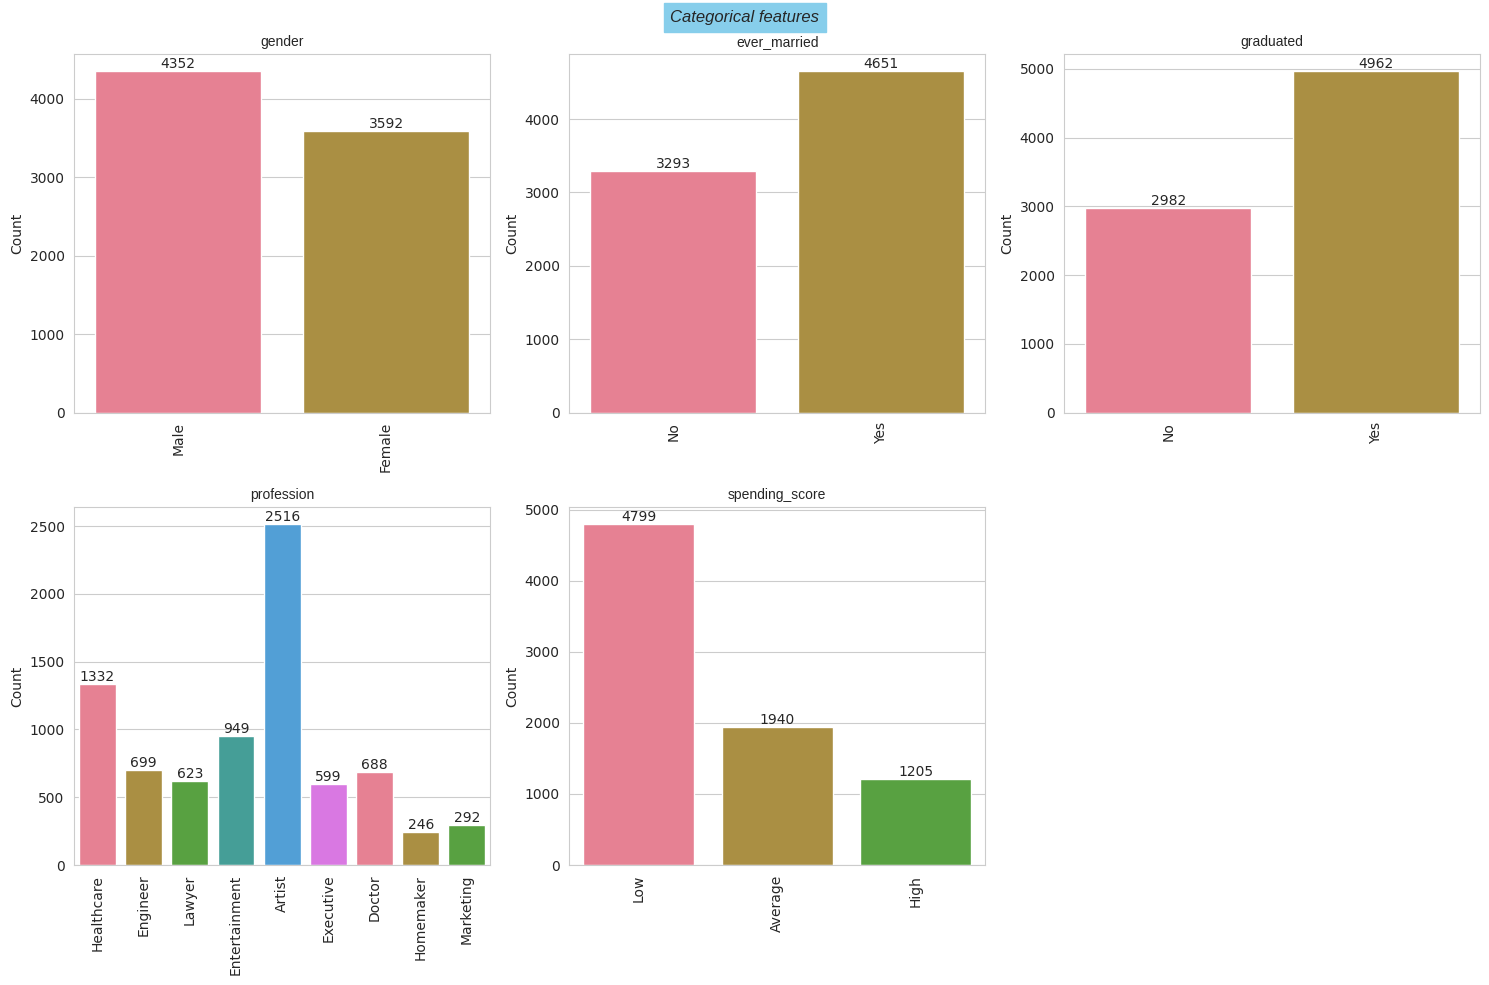

In [ ]:
# Exploring categorical features
df_cat = df.select_dtypes('object')
fig = plt.figure(figsize = (15,10))
plt.suptitle('Categorical features',style = 'italic' , backgroundcolor = 'skyblue', font = 'Liberation Sans')

for i,j in enumerate(df_cat.columns):
    ax = fig.add_subplot(2,3,i+1)
    ax = sns.countplot(df , x = j, palette = sns.color_palette('husl') )
    ax.set_title(j , fontsize = 15 , style = 'italic', font = 'Liberation Sans')
    ax.set_xticklabels(labels = df[j].unique() , rotation = 90)
    ax.set_ylabel('Count')
    ax.set_xlabel('')
    ax.bar_label(ax.containers[0],label_type='edge')

plt.tight_layout()

## Exploring Numerical Feature

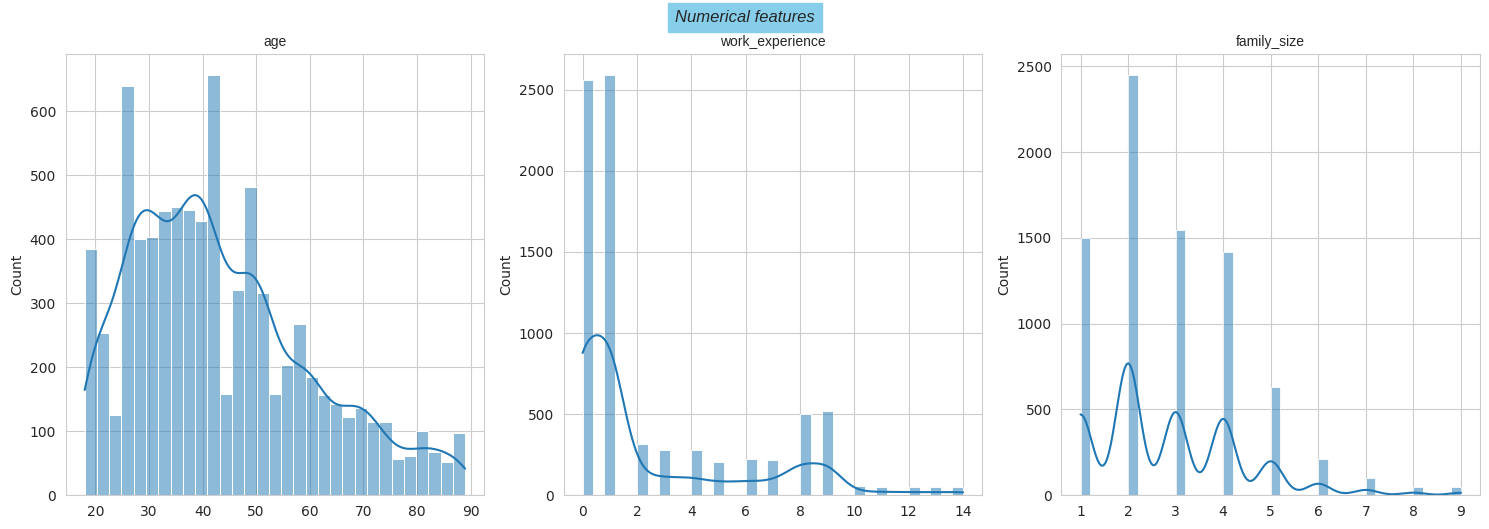

In [ ]:
# Exploring numerical features
df_num = df.select_dtypes(['float64','int64'])
fig = plt.figure(figsize = (15,10))
plt.suptitle('Numerical features',style = 'italic' , backgroundcolor = 'skyblue', font = 'Liberation Sans')

for i,j in enumerate(df_num.columns):
    ax = fig.add_subplot(2,3,i+1)
    ax = sns.histplot(df , x = j, kde = True )
    ax.set_title(j , fontsize = 15 , style = 'italic', font = 'Liberation Sans')
    ax.set_ylabel('Count')
    ax.set_xlabel('')

plt.tight_layout()

# Data Preprocessing

In [ ]:
# Encoding unique values each columns
dfs=df.copy()
dfs['ever_married']=dfs['ever_married'].replace(('Yes','No'),(1,0))
dfs['graduated']=dfs['graduated'].replace(('Yes','No'),(1,0))
dfs['gender']=dfs['gender'].replace(('Male','Female'),(1,0))

proff=list(dfs['profession'].unique())
dfs['profession']=dfs['profession'].apply(lambda x:proff.index(x)+1 )

scor=list(dfs['spending_score'].unique())
dfs['spending_score']=dfs['spending_score'].apply(lambda x:scor.index(x)+1 )

dfs.head(5)

,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size
0,1,0,22,0,1,1.0,1,4.0
1,0,1,38,1,2,1.0,2,3.0
2,0,1,67,1,2,1.0,1,1.0
3,1,1,67,1,3,0.0,3,2.0
4,0,1,40,1,4,0.0,3,6.0


# Clustering

In [ ]:
!pip install kmodes

In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
dfs.head(2)

,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size
0,1,0,22,0,1,1.0,1,4.0
1,0,1,38,1,2,1.0,2,3.0


In [ ]:
cat_feature= [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
data=df.values
cat_feature

[0, 1, 3, 4, 6]

In [ ]:
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=20).fit(data, categorical=cat_feature)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 2569, ncost: 744037.3851553253
Run: 1, iteration: 2/20, moves: 1847, ncost: 595073.0798696744
Run: 1, iteration: 3/20, moves: 1342, ncost: 508137.6502260209
Run: 1, iteration: 4/20, moves: 362, ncost: 499016.7997532923
Run: 1, iteration: 5/20, moves: 296, ncost: 494176.5960357331
Run: 1, iteration: 6/20, moves: 160, ncost: 492813.34406588326
Run: 1, iteration: 7/20, moves: 179, ncost: 491355.85505006457
Run: 1, iteration: 8/20, moves: 38, ncost: 491279.4898407265
Run: 1, iteration: 9/20, moves: 1, ncost: 491279.33656785835
Run: 1, iteration: 10/20, moves: 0, ncost: 491279.33656785835
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 1254, ncost: 549381.515720294
Run: 2, iteration: 2/20, moves: 905, ncost: 500595.9158398595
Run: 2, iteration

# Cluster Analysis

In [ ]:
clusters = kproto.predict(data, categorical=cat_feature)
dfs['cluster'] = list(clusters)
dfs['profession']=df['profession']
dfs['gender']=df['gender']
dfs['ever_married']=df['ever_married']
dfs['graduated']=df['graduated']
dfs['spending_score']=df['spending_score']

In [ ]:
dfs

,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,cluster
0,Male,No,22,No,Healthcare,1.0,Low,4.0,1
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,2
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,2
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,0
...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,0
8064,Male,No,35,No,Executive,3.0,Low,4.0,1
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,1
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,1


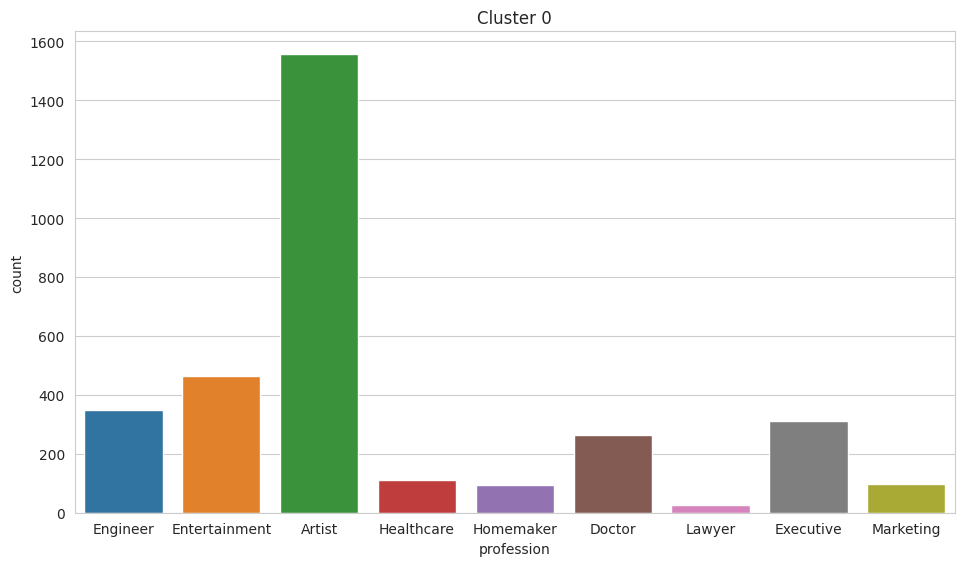

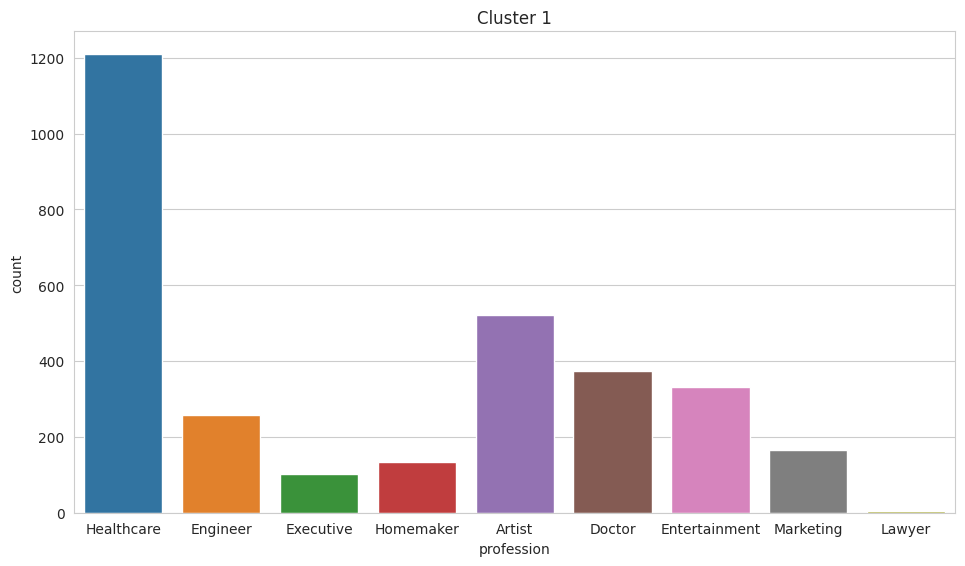

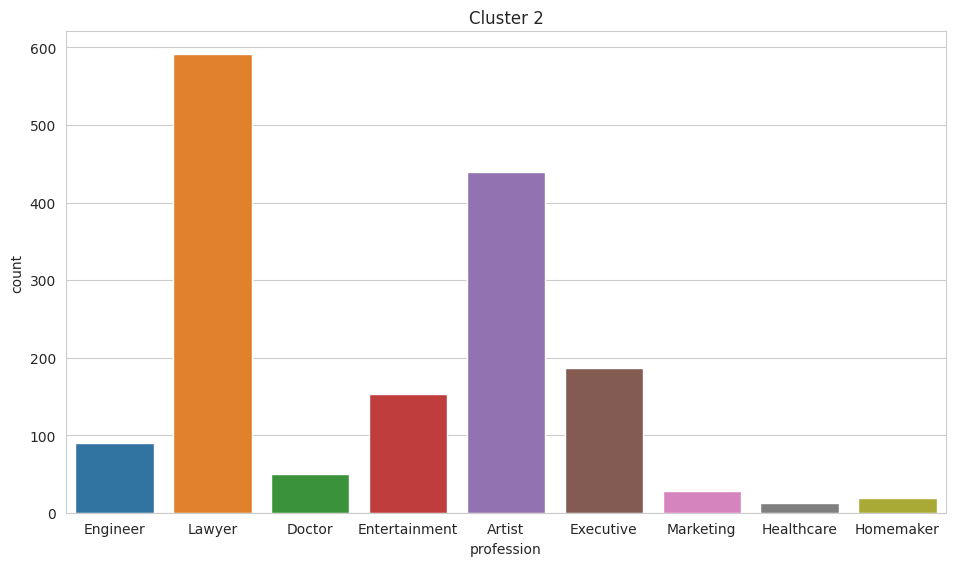

In [ ]:
for i in [0,1,2]:
    plt.figure(figsize=(25,25))
    plt.subplot(3,2,i+1)
    plt.title("Cluster "+str(i))
    dfs.query("cluster=="+str(i))
    sns.countplot(dfs.query("cluster=="+str(i)),x="profession")
    plt.subplots_adjust(hspace=0.5)


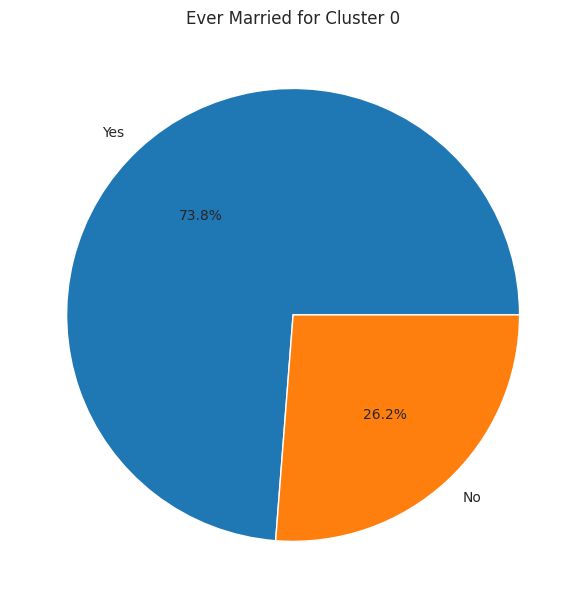

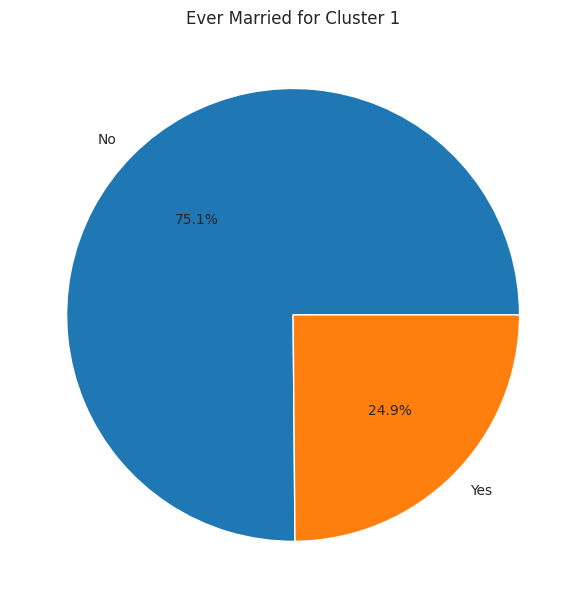

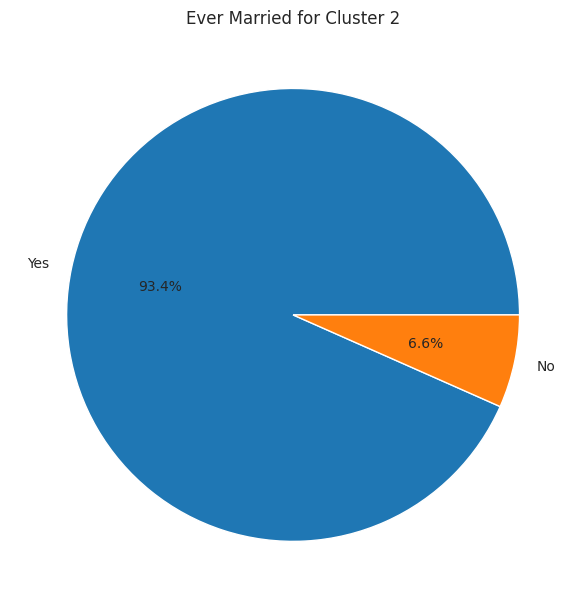

In [ ]:
for i in [0,1,2]:
    plt.figure(figsize=(25,25))
    plt.subplot(3,2,i+1)
    data = dfs.query("cluster=="+str(i)).ever_married.value_counts()


    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title('Ever Married for Cluster '+str(i))
    plt.show()

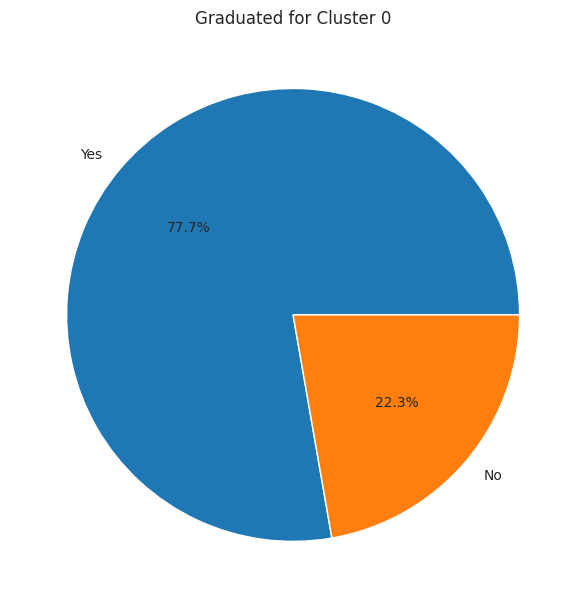

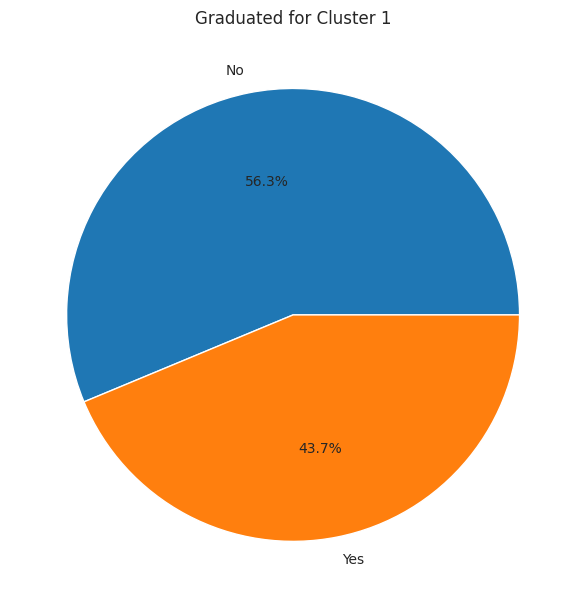

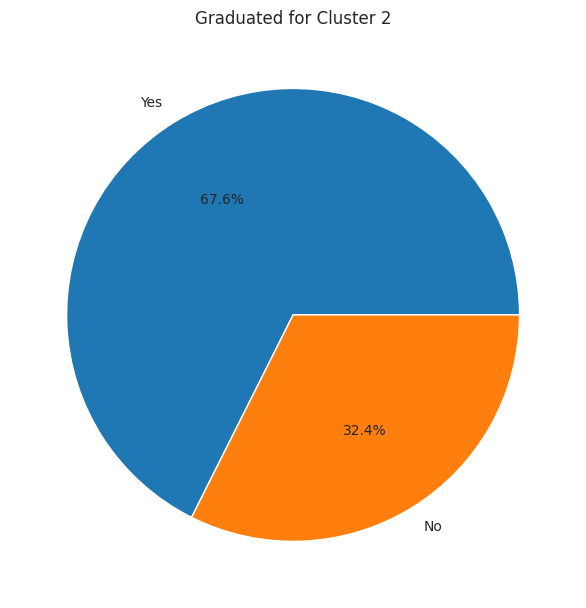

In [ ]:
for i in [0,1,2]:
    plt.figure(figsize=(25,25))
    plt.subplot(3,2,i+1)
    data = dfs.query("cluster=="+str(i)).graduated.value_counts()


    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title('Graduated for Cluster '+str(i))
    plt.show()

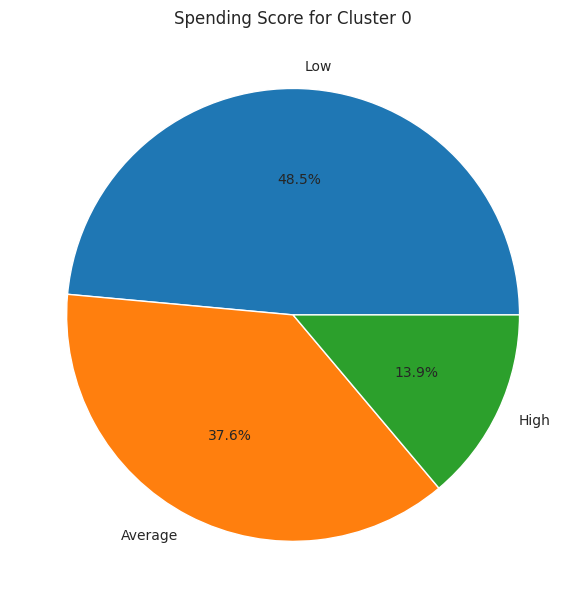

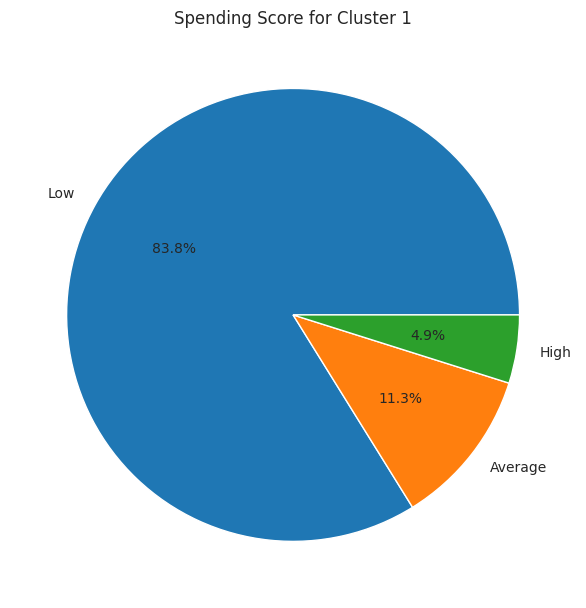

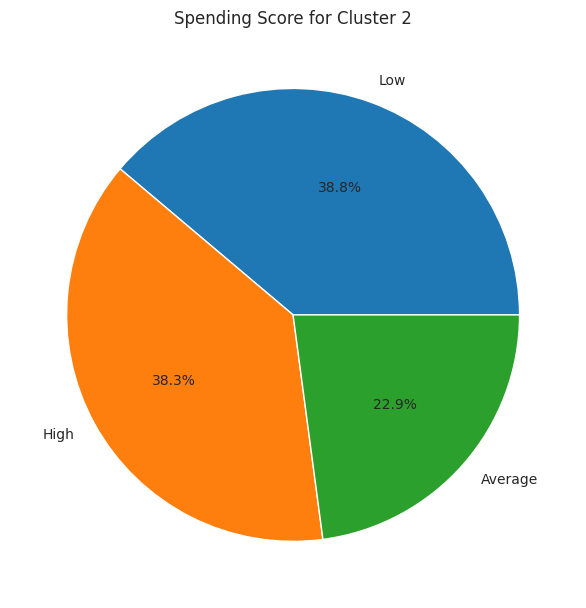

In [ ]:
for i in [0,1,2]:
    plt.figure(figsize=(25,25))
    plt.subplot(3,2,i+1)
    data = dfs.query("cluster=="+str(i)).spending_score.value_counts()


    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title('Spending Score for Cluster '+str(i))
    plt.show()

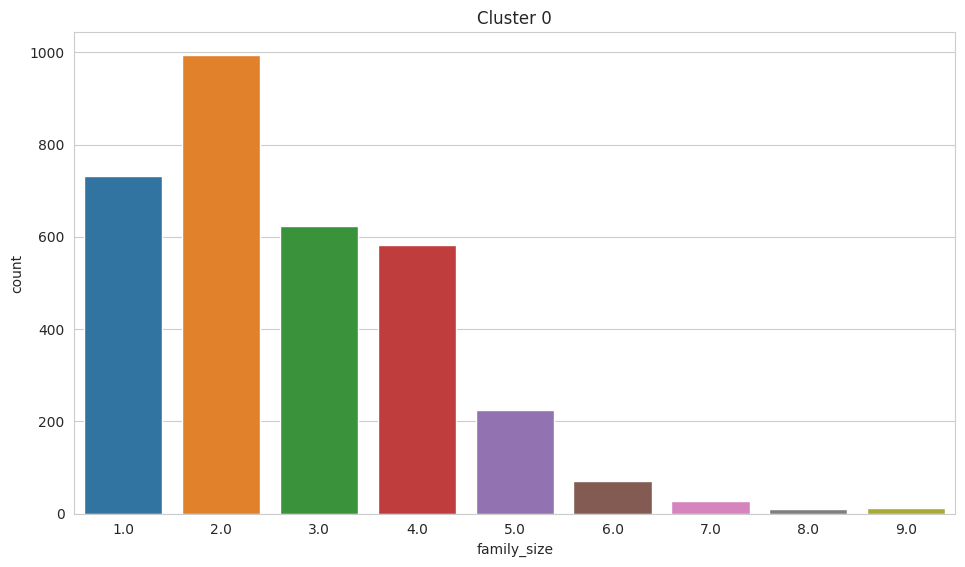

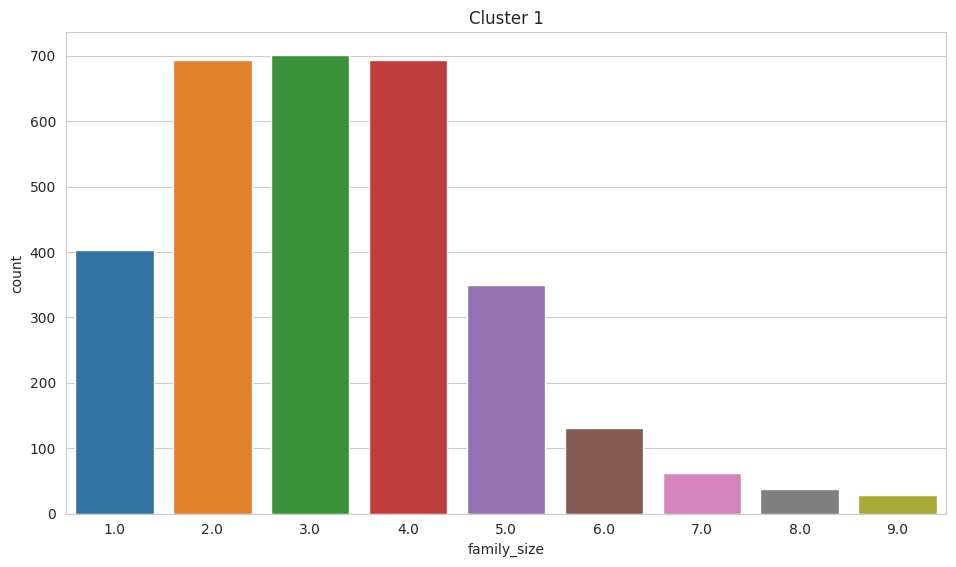

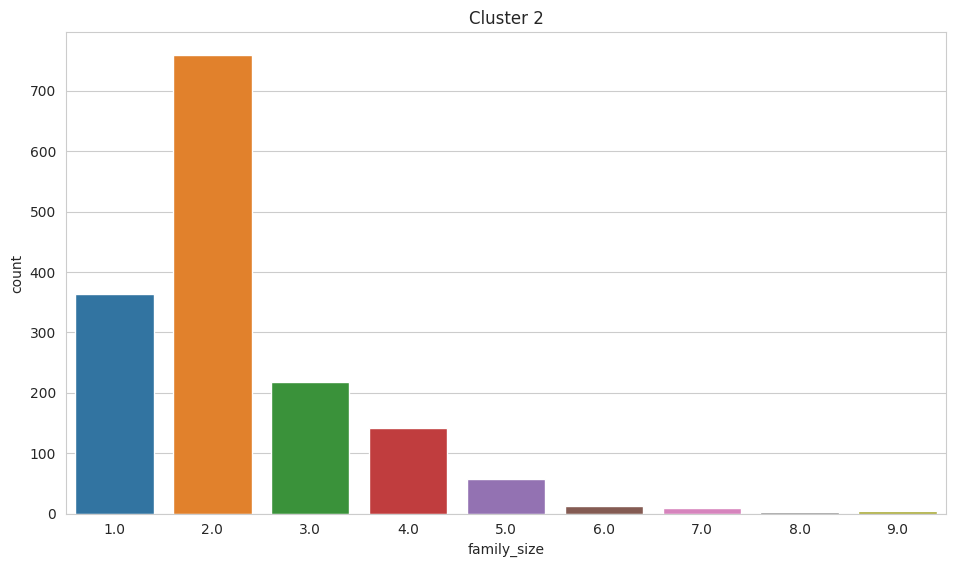

In [ ]:
for i in [0,1,2]:
    plt.figure(figsize=(25,25))
    plt.subplot(3,2,i+1)
    plt.title("Cluster "+str(i))
    dfs.query("cluster=="+str(i))
    sns.countplot(dfs.query("cluster=="+str(i)),x="family_size")
    plt.subplots_adjust(hspace=0.5)


In [ ]:
print(dfs[['cluster','age']].groupby(by=['cluster']).mean())

               age
cluster           
0        45.470840
1        27.860045
2        70.237245


# Summary

**Cluster 0**

* Jobs : Mostly Artist || Entertainment || Engineer

* Married : Yes 74 % || No 26 %

* Graduated : Yes 78 % || No 22 %

* Spending Score : Low 48% || Average 38 % || High 14 %

* Family Size : Mostly 2 || Sometimes 1 || Sometimes 3

* Average Age : 45

Cluster 2 is characterized by customers who are mostly in the artistic and executive fields, have a low and average spending score, and are mostly married and graduated, with an average age of 45.

They are likely to be budget-conscious shoppers but also willing to spend on average priced items. They are likely to have a family and are in the prime of their career.

---

**Cluster 1**

* Jobs : Mostly Healthcare || Artist || Doctor

* Married : Yes 25 % || No 75 %

* Graduated : Yes 44 % || No 56 %

* Spending Score : Low 84% || Average 11 % || High 5 %

* Family Size : Mostly 2 or 3 or 4

* Average Age : 28

Cluster 0 is characterized by customers who are mostly in the healthcare fields artistic, and doctor, have a low spending score, and are mostly not married and not graduated, with an younger average age (28).

They are mostly budget-conscious shoppers but are more likely to be single. They are likely to have a balance between work and personal life.

---

**Cluster 2**

* Jobs : Mostly Lawyer || Artist || Execution

* Married : Yes 93 % || No 7 %

* Graduated : Yes 68 % || No 32 %

* Spending Score : Low 39% || Average 23 % || High 38 %

* Family Size : Mostly 2 || Sometimes 1 || Sometimes 3

* Average Age : 70

Cluster 1 is characterized by customers who are mostly in the legal and artistic fields, have a low and high spending score, and are mostly married and graduated, with a older average age (70).

They are mostly budget-conscious shoppers and have a higher chance to be family-oriented. And also includes a high number of customers with High Spending score.